In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import os
import nltk.corpus
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [4]:
# read result 
result = pd.read_csv("result.csv") 
Tags = result["Tag"]
Tags

0             HTML Laravel MySQL PHP Software Architecture
1                     CSS Google Firebase HTML5 JavaScript
2         Graphic Design Illustration Illustrator Logo ...
3                                                    Excel
4         Facebook Marketing JavaScript PHP Software Ar...
                               ...                        
20001     After Effects Animation Graphic Design Video ...
20002     Graphic Design Illustrator Photoshop Photosho...
20003     3D Animation After Effects Animation Video Ed...
20004                 Graphic Design Logo Design Photoshop
20005                                       Website Design
Name: Tag, Length: 20006, dtype: object

In [5]:
allTag = ""
for row in result.index: 
    allTag = allTag + " " + result['Tag'][row]

In [6]:
# find most popular 20tag 
token = word_tokenize(allTag)
fdist = FreqDist(token)
fdist20 = fdist.most_common(20)
fdist20

[('Design', 12734),
 ('PHP', 4875),
 ('Graphic', 4641),
 ('Website', 4248),
 ('HTML', 3707),
 ('Marketing', 3245),
 ('Writing', 3170),
 ('Data', 2872),
 ('Development', 2643),
 ('Photoshop', 2362),
 ('App', 1964),
 ('Logo', 1877),
 ('Mobile', 1855),
 ('WordPress', 1714),
 ('Article', 1697),
 ('Software', 1595),
 ('Architecture', 1564),
 ('3D', 1561),
 ('Entry', 1548),
 ('Excel', 1497)]

In [7]:
import matplotlib.pyplot as plt

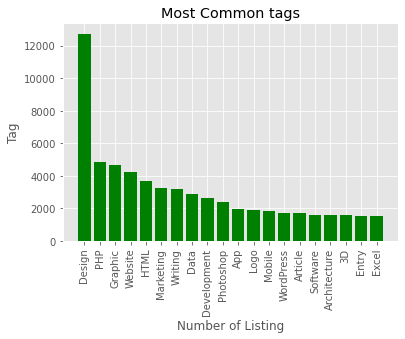

In [8]:
plt.style.use('ggplot')

x = []
count = []
for i in range(len(fdist20)): 
    x.append(fdist20[i][0])
    count.append(fdist20[i][1])

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, count, color='green')
plt.xticks(rotation=90)
plt.ylabel("Tag")
plt.xlabel("Number of Listing")
plt.title("Most Common tags")

plt.xticks(x_pos, x)

plt.show()